In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [198]:
def readCsv(file_name):
    return pd.read_csv(file_name ,header=0 , sep=',')

In [199]:
def createCsv(df,file_name):
    df.to_csv(file_name+'.csv', sep='\t', encoding='utf-8')

In [200]:
def count_duplicatives(df, col_name=None):
    
    if(col_name==None):
        return df.duplicated().sum()
    return df.duplicated([col_name]).sum()

In [201]:
def remove_duplicatives(df, col_name=None):
    if(col_name==None):
        return df.drop_duplicates(inplace=True)
    return df.drop_duplicates(subset=[col_name],inplace=True)

In [202]:
def removeDuplicatedFromAllColsInDf(df):
    for col in df.columns:
        df=remove_duplicatives(df,col)
    return df.copy()

In [203]:
def printNumOfDuplicatedInEachCol(df):
    for col in df.columns:
        print("Col=",col)
        print("Num Of Duplicates",count_duplicatives(df,col))

1.Reading the csv 


In [204]:

df=readCsv('./Bitter.csv')
df


/var/folders/h9/m6p5vy652xqfyg00z9hcp_x00000gn/T/ipykernel_22957/3461214278.py:1: DtypeWarning: Columns (0,4,5,6,8,9,179,180,182,260,261,263,264,266,269,277,278,296) have mixed types.Specify dtype option on import or set low_memory=False.
  df=readCsv('./Bitter.csv')


,Index,Name,PUBCHEM_COMPOUND_CID,ACTIVITY,ID,NonBitterID,Smiles,Frequency,Canonical_Smiles,Standardize_Actions_Taken,...,Kappa_2_AM,Kappa_3,Kappa_3_AM,PHI,SC_0,SC_1,SC_2,SC_3_C,SC_3_CH,SC_3_P
0,1,7765,"7,765",Non-Bitter,NaN,1_Fnb,O(C([H])([H])C([H])([H])[H])C([H])(C([H])([H])...,1.0,CCOC(C)OCC,NaN,...,5.06450,5.00000,4.92000,5.01386,8.0,7.0,7.0,1.0,0.0,6.0
1,2,177,177,Non-Bitter,2_Fnb,2_Fnb,O=C([H])C([H])([H])[H],1.0,CC=O,NaN,...,1.67000,0.00000,0.00000,1.48630,3.0,2.0,1.0,0.0,0.0,0.0
2,3,62876,"62,876",Non-Bitter,3_Fnb,3_Fnb,O(C([H])(C([H])([H])[H])OC([H])([H])C([H])([H]...,1.0,CCCCOC(C)OCCc1ccccc1,StandardizeStereo\nStandardizeStereo_ChiralFlag,...,8.31033,7.05817,6.36993,6.85916,16.0,16.0,18.0,2.0,0.0,19.0
3,4,83036,"83,036",Non-Bitter,4_Fnb,4_Fnb,O(C([H])(C([H])([H])[H])OC([H])([H])C([H])([H]...,1.0,CC(C)CCOC(C)OCCC(C)C,NaN,...,8.24664,11.00000,10.92000,8.19952,14.0,13.0,15.0,3.0,0.0,12.0
4,5,108504,"108,504",Non-Bitter,5_Fnb,5_Fnb,O(C([H])([H])C([H])([H])C([H])=C([H])C([H])([H...,1.0,CCOC(C)OCCC=CCC,StandardizeStereo\nStandardizeStereo_ChiralFlag,...,8.75380,9.00000,8.65999,8.50578,12.0,11.0,11.0,1.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,NaN,NaN,"413,117",Bitter,NaN,NaN,NaN,NaN,NaN,NaN,...,5.92920,3.27662,2.74126,4.44624,20.0,21.0,30.0,9.0,0.0,41.0
2071,NaN,NaN,"435,597",Bitter,NaN,NaN,NaN,NaN,NaN,NaN,...,7.92510,4.54545,3.92711,6.18370,23.0,24.0,33.0,9.0,0.0,44.0
2072,NaN,NaN,"2,883,177",Bitter,NaN,NaN,NaN,NaN,NaN,NaN,...,4.70656,2.88000,2.23854,3.37571,19.0,20.0,30.0,10.0,0.0,40.0
2073,NaN,NaN,"3,082,543",Bitter,NaN,NaN,NaN,NaN,NaN,NaN,...,8.19905,3.75047,3.58522,6.04243,34.0,38.0,63.0,25.0,0.0,92.0


In [205]:
#remove cols with less than 50% of info

def removeColsWithTooManyNaNs(df, num_max_missing_cells):
    num_of_cells_in_df=len(df.index)
    return df.dropna(axis=1,thresh=num_of_cells_in_df-num_max_missing_cells,inplace=True)


In [206]:
#fill missing cells with na
def removeColsWithSingleUniqueValue(df):
    for col in df.columns:
        uniquesValues=len(df[col].unique())
        
        if(int(uniquesValues)==1):
            # print("Uniq Values=",uniquesValues)
            # print("Dropped ",col)
            df.drop(columns=[col],axis=1,inplace=True)
        


 if 50% empty or const or null 


In [207]:
removeColsWithSingleUniqueValue(df)


if there is a single uniqe value in a col , remove the col.

In [208]:
removeColsWithTooManyNaNs(df,(len(df.index))/2 )

In [209]:
#replace missing value in dataframe
def replace_missing_values(df):
    
    for col in df.columns:
     #    isColInDic=col_to_def_val_dict.get(col,False)
     #    if(isColInDic):
     #         df[col].fillna(isColInDic,inplace=True)
        if(df[col].dtype==np.float64 or df[col].dtype==np.int64):
             df[col].fillna(df[col].median(),inplace=True)
             
        else:
            mostFreqStr=df[col].mode()
            df[col].fillna(mostFreqStr[0],inplace=True)
         


replace null or empty cells of type int or float with the column median value

replace null or empty cells with type of string with the most common syting in the column

In [210]:

replace_missing_values(df)
df

,Index,Name,PUBCHEM_COMPOUND_CID,ACTIVITY,ID,NonBitterID,Smiles,Frequency,Canonical_Smiles,ALogP98,...,Kappa_2_AM,Kappa_3,Kappa_3_AM,PHI,SC_0,SC_1,SC_2,SC_3_C,SC_3_CH,SC_3_P
0,1,7765,"7,765",Non-Bitter,1000_Fnb,1_Fnb,O(C([H])([H])C([H])([H])[H])C([H])(C([H])([H])...,1.0,CCOC(C)OCC,0.777,...,5.06450,5.00000,4.92000,5.01386,8.0,7.0,7.0,1.0,0.0,6.0
1,2,177,177,Non-Bitter,2_Fnb,2_Fnb,O=C([H])C([H])([H])[H],1.0,CC=O,-0.183,...,1.67000,0.00000,0.00000,1.48630,3.0,2.0,1.0,0.0,0.0,0.0
2,3,62876,"62,876",Non-Bitter,3_Fnb,3_Fnb,O(C([H])(C([H])([H])[H])OC([H])([H])C([H])([H]...,1.0,CCCCOC(C)OCCc1ccccc1,3.313,...,8.31033,7.05817,6.36993,6.85916,16.0,16.0,18.0,2.0,0.0,19.0
3,4,83036,"83,036",Non-Bitter,4_Fnb,4_Fnb,O(C([H])(C([H])([H])[H])OC([H])([H])C([H])([H]...,1.0,CC(C)CCOC(C)OCCC(C)C,3.240,...,8.24664,11.00000,10.92000,8.19952,14.0,13.0,15.0,3.0,0.0,12.0
4,5,108504,"108,504",Non-Bitter,5_Fnb,5_Fnb,O(C([H])([H])C([H])([H])C([H])=C([H])C([H])([H...,1.0,CCOC(C)OCCC=CCC,2.225,...,8.75380,9.00000,8.65999,8.50578,12.0,11.0,11.0,1.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,1,Quinine,"413,117",Bitter,1000_Fnb,100,BrC(C(N([H])C(N([H])[H])=O)=O)(C([H])([H])C([H...,1.0,C,-0.097,...,5.92920,3.27662,2.74126,4.44624,20.0,21.0,30.0,9.0,0.0,41.0
2071,1,Quinine,"435,597",Bitter,1000_Fnb,100,BrC(C(N([H])C(N([H])[H])=O)=O)(C([H])([H])C([H...,1.0,C,1.800,...,7.92510,4.54545,3.92711,6.18370,23.0,24.0,33.0,9.0,0.0,44.0
2072,1,Quinine,"2,883,177",Bitter,1000_Fnb,100,BrC(C(N([H])C(N([H])[H])=O)=O)(C([H])([H])C([H...,1.0,C,1.417,...,4.70656,2.88000,2.23854,3.37571,19.0,20.0,30.0,10.0,0.0,40.0
2073,1,Quinine,"3,082,543",Bitter,1000_Fnb,100,BrC(C(N([H])C(N([H])[H])=O)=O)(C([H])([H])C([H...,1.0,C,0.975,...,8.19905,3.75047,3.58522,6.04243,34.0,38.0,63.0,25.0,0.0,92.0


transform ACTIVITY column to binary val

In [211]:
#transform ACTIVITY to binary val
# print(df.ACTIVITY)
df.replace({"Non-Bitter":0,"Bitter":1},inplace=True)


In [212]:
#delete name and index since it helps us with nothing
df.drop(labels=['Name','Index'],axis=1,inplace=True)

In [213]:
replace_missing_values(df)


In [214]:
# count outliers 
#  remove outliers






def outlier_detection_iqr(df,iqrAccuracy=3.0):
    outlier_counter=0
    for (columnName, columnData) in df.iteritems():
        if(df[columnName].dtype==np.float64 or df[columnName].dtype==np.int64):
            q1=np.percentile(df[columnName],25)
            q3=np.percentile(df[columnName],75)
            iqr=q3-q1
            left_limit=q1-iqr*iqrAccuracy
            right_limit=q3+iqr*iqrAccuracy
            for index, row in df.iterrows():
                if row[columnName] <left_limit or row[columnName] >right_limit :
                     outlier_counter+=1
                     df.drop(index, inplace=True)
            print("Outliers in column "+columnName+" = "+ str(outlier_counter))               
   
    

In [215]:
def printAvgAndMeanOfEachDFColumn(df):
   for (columnName, columnData) in df.iteritems():
        if(df[columnName].dtype==np.float64 or df[columnName].dtype==np.int64):
            print("=========================================")
            print("Column",columnName)
            print("Avg=",df[columnName].mean())
            print("Std",df[columnName].std())
            


In [216]:
printAvgAndMeanOfEachDFColumn(df)

Column ACTIVITY
Avg= 0.2636144578313253
Std 0.4406988464610114
Column Frequency
Avg= 1.0
Std 0.0
Column ALogP98
Avg= 1.9639021686746987
Std 1.9948543394571523
Column ALogP98_Unknown
Avg= 0.03662650602409639
Std 0.20030880877482912
Column ES_Sum_aaaC
Avg= 0.06281734939759036
Std 0.388360049875321
Column ES_Sum_aaCH
Avg= 3.6344399999999997
Std 5.1138063427478615
Column ES_Sum_aaN
Avg= 0.4490530120481928
Std 1.7982193019061035
Column ES_Sum_aaNH
Avg= 0.05250843373493977
Std 0.4683359926657722
Column ES_Sum_aaO
Avg= 0.22066795180722892
Std 1.1112926925497018
Column ES_Sum_aaS
Avg= 0.02392289156626506
Std 0.19280040951383706
Column ES_Sum_aasC
Avg= 0.5638072289156627
Std 1.6019005622167257
Column ES_Sum_aasN
Avg= 0.0008563855421686746
Std 0.039010218000335946
Column ES_Sum_dCH2
Avg= 0.34389108433734944
Std 1.1882515362078918
Column ES_Sum_ddC
Avg= 0.006004337349397589
Std 0.13302588360631193
Column ES_Sum_ddsN
Avg= -0.013706506024096387
Std 0.16067050662224577
Column ES_Sum_ddssS
Avg= -0.19

In [217]:

outlier_detection_iqr(df)
replace_missing_values(df)
createCsv(df,'cleaned_data_not_normalized')

Outliers in column ACTIVITY = 0
Outliers in column Frequency = 0
Outliers in column ALogP98 = 15
Outliers in column ALogP98_Unknown = 84
Outliers in column ES_Sum_aaaC = 141
Outliers in column ES_Sum_aaCH = 144
Outliers in column ES_Sum_aaN = 257
Outliers in column ES_Sum_aaNH = 261
Outliers in column ES_Sum_aaO = 331
Outliers in column ES_Sum_aaS = 336
Outliers in column ES_Sum_aasC = 364
Outliers in column ES_Sum_aasN = 364
Outliers in column ES_Sum_dCH2 = 527
Outliers in column ES_Sum_ddC = 528
Outliers in column ES_Sum_ddsN = 545
Outliers in column ES_Sum_ddssS = 588
Outliers in column ES_Sum_dNH = 588
Outliers in column ES_Sum_dO = 600
Outliers in column ES_Sum_dS = 616
Outliers in column ES_Sum_dsCH = 625
Outliers in column ES_Sum_dsN = 638
Outliers in column ES_Sum_dssC = 923
Outliers in column ES_Sum_dssS = 924
Outliers in column ES_Sum_dsssP = 926
Outliers in column ES_Sum_sBr = 928
Outliers in column ES_Sum_sCH3 = 937
Outliers in column ES_Sum_sCl = 949
Outliers in column ES_

<AxesSubplot:ylabel='Frequency'>

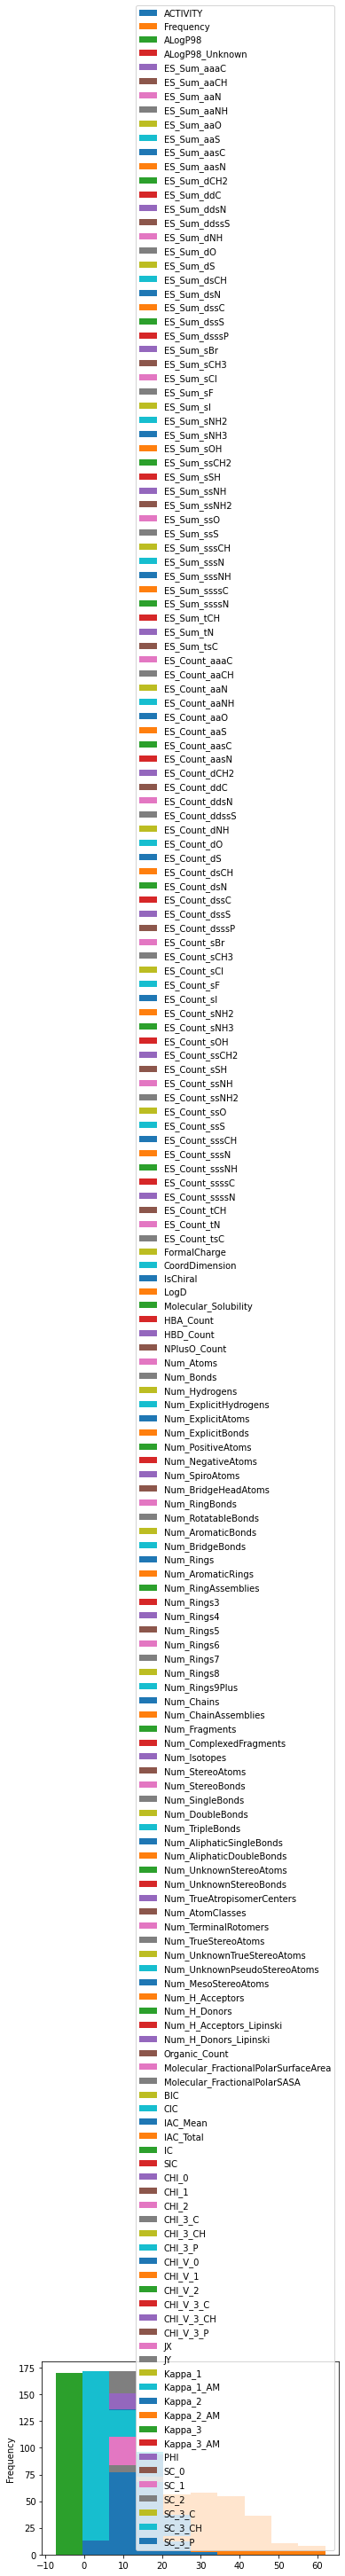

In [218]:
#show histograma and box plot
df.plot.hist()

<AxesSubplot:>

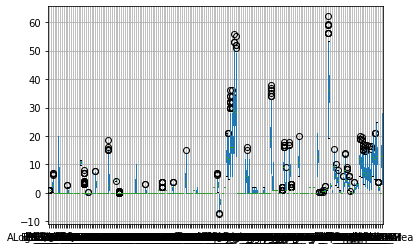

In [219]:
df.boxplot()

In [220]:
# normalize
df = df.apply(pd.to_numeric, errors='coerce')
removeColsWithSingleUniqueValue(df)
removeColsWithTooManyNaNs(df,(len(df.index)-1)/2)
replace_missing_values(df)
createCsv(df,'normalizedData')





<AxesSubplot:>

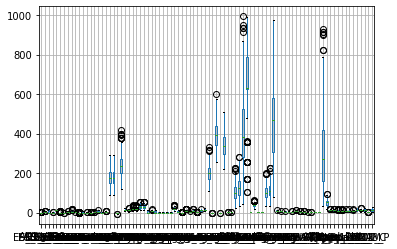

In [221]:
df.boxplot()


<AxesSubplot:ylabel='Frequency'>

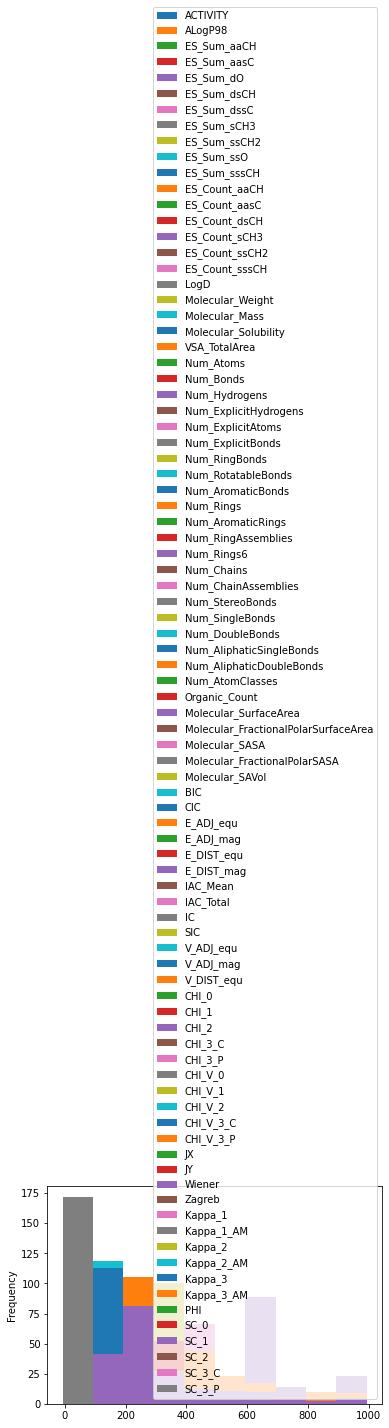

In [222]:
df.plot.hist()
